In [1]:
!sudo apt install tesseract-ocr

!pip install pytesseract gtts pandas numpy matplotlib seaborn scipy

print("✅ All libraries installed successfully!")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.0
    Uninstalling click-8.3.0:
      Successfully uninstalled click-8.3.0
✅ All libraries installed successfully!


Generated a sample prescription image: 'prescription.png'


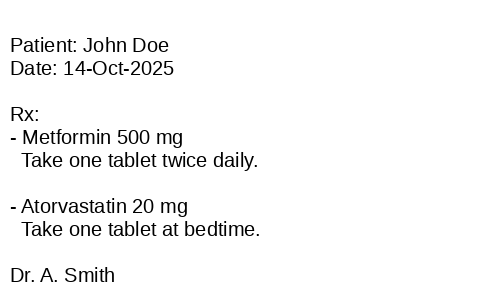


--- OCR Extracted Text ---
Patient: John Doe
Date: 14-Oct-2025

Rx:
- Metformin 500 mg
Take one tablet twice daily.

- Atorvastatin 20 mg
Take one tablet at bedtime.

Dr. A. Smith


--- Parsed Medication Details ---
Medication 1: Metformin 500 mg
Take one tablet twice daily.
Instruction: - Atorvastatin 20 mg
Take one tablet at bedtime


In [9]:
import pandas as pd
import numpy as np
import pytesseract
from PIL import Image, ImageDraw, ImageFont
import re
from gtts import gTTS
from IPython.display import Audio, display

try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", 20)
except IOError:
    font = ImageFont.load_default()

img = Image.new('RGB', (500, 300), color = (255, 255, 255))
d = ImageDraw.Draw(img)

prescription_text = """
Patient: John Doe
Date: 14-Oct-2025

Rx:
- Metformin 500 mg
  Take one tablet twice daily.

- Atorvastatin 20 mg
  Take one tablet at bedtime.

Dr. A. Smith
"""

d.text((10,10), prescription_text, fill=(0,0,0), font=font)
img.save("prescription.png")

print("Generated a sample prescription image: 'prescription.png'")
display(img)

extracted_text = pytesseract.image_to_string(Image.open('prescription.png'))

print("\n--- OCR Extracted Text ---")
print(extracted_text)

medications = re.findall(r'- (.*?)\n\s+(.*?)\.', extracted_text, re.DOTALL)

print("\n--- Parsed Medication Details ---")
if medications:
    for i, (med, instruction) in enumerate(medications):
        print(f"Medication {i+1}: {med.strip()}")
        print(f"Instruction: {instruction.strip()}")
else:
    print("No medications found.")

In [10]:
if medications:
    tts_text = "Here is your prescription summary. "
    for med, instruction in medications:
        tts_text += f"Medication: {med.strip()}. Instruction: {instruction.strip()}. "

    print("Text to be converted to speech:")
    print(tts_text)

    tts = gTTS(text=tts_text, lang='en')
    tts.save("prescription_audio.mp3")

    print("\n🔊 Playing Prescription Summary:")
    display(Audio("prescription_audio.mp3", autoplay=False))
else:
    print("Cannot generate audio as no medication details were parsed.")

Text to be converted to speech:
Here is your prescription summary. Medication: Metformin 500 mg
Take one tablet twice daily.. Instruction: - Atorvastatin 20 mg
Take one tablet at bedtime. 

🔊 Playing Prescription Summary:


In [4]:
num_users = 200
np.random.seed(42)

data = {
    'user_id': range(1, num_users + 1),
    'age_group': np.random.choice(['30-45', '46-60', '61+'], num_users, p=[0.3, 0.4, 0.3]),
    'usage_frequency': np.random.randint(1, 20, num_users),
    'adherence_score': np.random.randint(40, 100, num_users)
}

df = pd.DataFrame(data)

df['adherence_status'] = df['adherence_score'].apply(lambda x: 'Adherent' if x > 75 else 'Non-Adherent')

df.loc[df['usage_frequency'] > 10, 'adherence_score'] += np.random.randint(0, 10, size=len(df[df['usage_frequency'] > 10]))
df['adherence_score'] = df['adherence_score'].clip(0, 100)

print("Successfully created user dataset. Here are the first 5 rows:")
display(df.head())

Successfully created user dataset. Here are the first 5 rows:


,user_id,age_group,usage_frequency,adherence_score,adherence_status
0,1,46-60,11,73,Non-Adherent
1,2,61+,17,63,Non-Adherent
2,3,61+,8,96,Adherent
3,4,46-60,4,75,Non-Adherent
4,5,30-45,6,49,Non-Adherent


--- 1. Chi-Square Test: Age Group vs. Adherence Status ---

Contingency Table:


adherence_status,Adherent,Non-Adherent
age_group,,
30-45,27,39
46-60,26,48
61+,27,33



Chi-Square Statistic: 1.38
P-value: 0.5022

Conclusion: We fail to reject the null hypothesis. There is no statistically significant association between age group and adherence status.


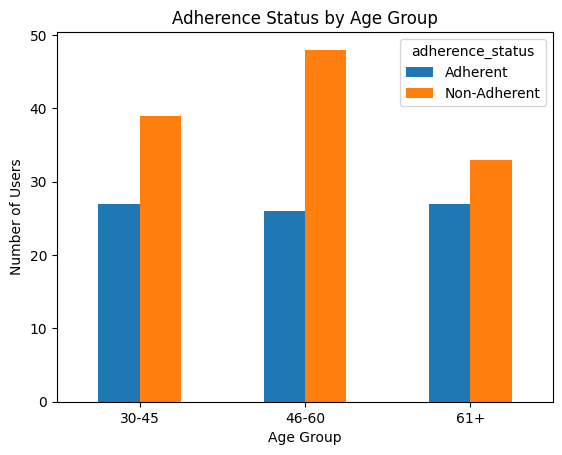

In [5]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

print("--- 1. Chi-Square Test: Age Group vs. Adherence Status ---\n")

contingency_table = pd.crosstab(df['age_group'], df['adherence_status'])

print("Contingency Table:")
display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis. There is a statistically significant association between age group and adherence status.")
else:
    print("\nConclusion: We fail to reject the null hypothesis. There is no statistically significant association between age group and adherence status.")

contingency_table.plot(kind='bar', stacked=False)
plt.title('Adherence Status by Age Group')
plt.ylabel('Number of Users')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()


--- 2. ANOVA Test: Adherence Score across Age Groups ---

F-Statistic: 1.56
P-value: 0.2134

Conclusion: We fail to reject the null hypothesis. There is no statistically significant difference in mean adherence scores among the age groups.


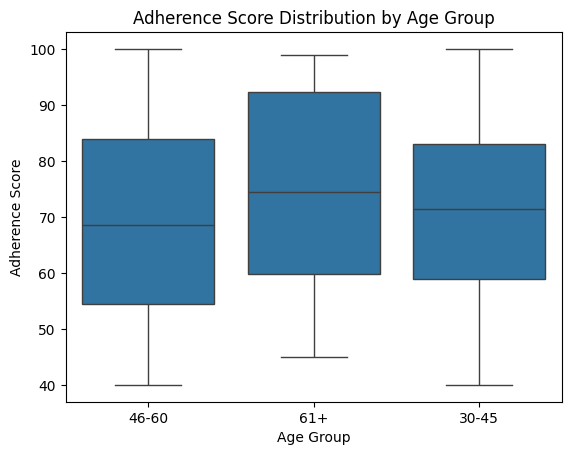

In [6]:
from scipy.stats import f_oneway

print("\n--- 2. ANOVA Test: Adherence Score across Age Groups ---\n")

group1 = df[df['age_group'] == '30-45']['adherence_score']
group2 = df[df['age_group'] == '46-60']['adherence_score']
group3 = df[df['age_group'] == '61+']['adherence_score']

f_statistic, p_value = f_oneway(group1, group2, group3)

print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis. There is a statistically significant difference in mean adherence scores among the age groups.")
else:
    print("\nConclusion: We fail to reject the null hypothesis. There is no statistically significant difference in mean adherence scores among the age groups.")

sns.boxplot(x='age_group', y='adherence_score', data=df)
plt.title('Adherence Score Distribution by Age Group')
plt.ylabel('Adherence Score')
plt.xlabel('Age Group')
plt.show()


--- 3. Correlation Analysis: App Usage vs. Adherence Score ---

Pearson Correlation Coefficient (r): 0.07
P-value: 0.3080

Conclusion: We fail to reject the null hypothesis. There is no statistically significant correlation between app usage frequency and adherence score.


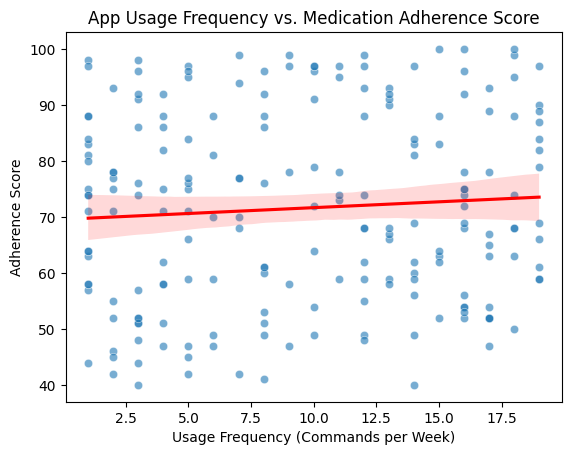

In [7]:
from scipy.stats import pearsonr

print("\n--- 3. Correlation Analysis: App Usage vs. Adherence Score ---\n")

usage = df['usage_frequency']
adherence = df['adherence_score']

corr, p_value = pearsonr(usage, adherence)

print(f"Pearson Correlation Coefficient (r): {corr:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"\nConclusion: We reject the null hypothesis. There is a statistically significant correlation between app usage frequency and adherence score.")
    if corr > 0:
        print("The correlation is positive, suggesting that higher app usage is associated with higher adherence.")
    else:
        print("The correlation is negative, suggesting that higher app usage is associated with lower adherence.")
else:
    print("\nConclusion: We fail to reject the null hypothesis. There is no statistically significant correlation between app usage frequency and adherence score.")

sns.scatterplot(x='usage_frequency', y='adherence_score', data=df, alpha=0.6)
sns.regplot(x='usage_frequency', y='adherence_score', data=df, scatter=False, color='red')
plt.title('App Usage Frequency vs. Medication Adherence Score')
plt.xlabel('Usage Frequency (Commands per Week)')
plt.ylabel('Adherence Score')
plt.show()

In [8]:
print("\n--- 4. Consolidating Data for Power BI Dashboard ---\n")

adherence_counts = pd.crosstab(df['age_group'], df['adherence_status'])

agg_metrics = df.groupby('age_group').agg(
    average_adherence_score=('adherence_score', 'mean'),
    average_usage_frequency=('usage_frequency', 'mean'),
    total_users=('user_id', 'count')
).round(2)

dashboard_df = pd.merge(agg_metrics, adherence_counts, on='age_group', how='left')

dashboard_df['adherence_rate_%'] = ((dashboard_df['Adherent'] / dashboard_df['total_users']) * 100).round(2)

dashboard_df = dashboard_df[['total_users', 'Adherent', 'Non-Adherent', 'adherence_rate_%', 'average_adherence_score', 'average_usage_frequency']]

print("Consolidated DataFrame for Power BI:")
display(dashboard_df)

dashboard_df.to_csv('powerbi_dashboard_data.csv')

print("\n✅ Successfully saved the consolidated data to 'powerbi_dashboard_data.csv'.")
print("You can now download this file from the Colab file explorer and import it into Power BI to build your dashboard.")


--- 4. Consolidating Data for Power BI Dashboard ---

Consolidated DataFrame for Power BI:


,total_users,Adherent,Non-Adherent,adherence_rate_%,average_adherence_score,average_usage_frequency
age_group,,,,,,
30-45,66,27,39,40.91,71.17,7.76
46-60,74,26,48,35.14,69.45,10.24
61+,60,27,33,45.00,74.62,10.73



✅ Successfully saved the consolidated data to 'powerbi_dashboard_data.csv'.
You can now download this file from the Colab file explorer and import it into Power BI to build your dashboard.
